In [1]:
import root_numpy as rnp
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


In [2]:
import os

In [3]:
data_folder = '~/Downloads/newhome/gw20264/muon-data/RPC-hits-data/202010_start_1001_only_rpcs_part237_RpcHitsReduced'

In [4]:
fname = os.path.join(data_folder, 'Run_part_237.root')

In [5]:
zx0= 373.5
zx1 = 256.5
zx2 = 74.1
zx3 = 7.8

zy0= 377.2
zy1= 260.5
zy2= 78.1
zy3= 11.8

In [6]:
y0=rnp.root2array(fname, treename="T", branches="globalhits.globalhit0")
y1=rnp.root2array(fname, treename="T", branches="globalhits.globalhit1")

y2=rnp.root2array(fname, treename="T", branches="globalhits.globalhit2")
y3=rnp.root2array(fname, treename="T", branches="globalhits.globalhit3")

x0=rnp.root2array(fname, treename="T", branches="globalhits.globalhit4")
x1=rnp.root2array(fname, treename="T", branches="globalhits.globalhit5")

x2=rnp.root2array(fname, treename="T", branches="globalhits.globalhit6")
x3=rnp.root2array(fname, treename="T", branches="globalhits.globalhit7")

In [7]:
xs=[x0,x1,x2,x3]
ys = [y0, y1, y2, y3]
zxs = [zx0, zx1, zx2, zx3]
zys = [zy0, zy1, zy2, zy3]

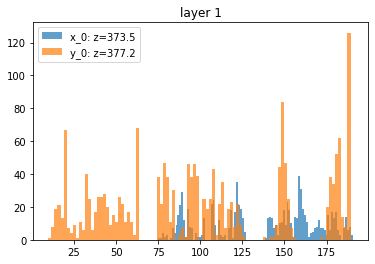

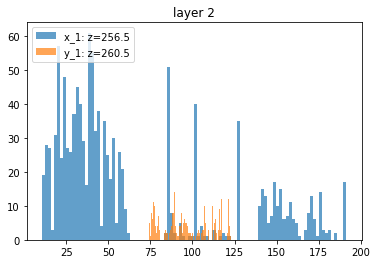

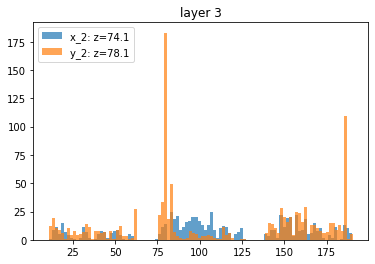

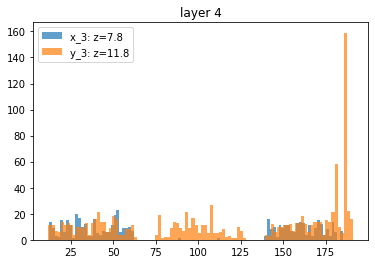

In [8]:
for i, (x,y, zx, zy) in enumerate(zip(xs,ys, zxs, zys)):
    plt.hist(x[x!=-1], bins=100, alpha=0.7, label='x_{}: z={}'.format(i, zx))
    plt.hist(y[y!=-1], bins=100, alpha=0.7, label='y_{}: z={}'.format(i, zy))
    plt.legend(loc='upper left')
    #plt.ylim(0,12000)
    plt.title('layer {}'.format(i+1))
    plt.show()

In [14]:
sn=rnp.root2array(fname, treename="T", branches="clustersn.clustersn0")

(array([4.9986e+04, 1.0000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([    0.        ,  4244.50143029,  8489.00286059, 12733.50429088,
        16978.00572118, 21222.50715147, 25467.00858176, 29711.51001206,
        33956.01144235, 38200.51287265, 42445.01430294]),
 <BarContainer object of 10 artists>)

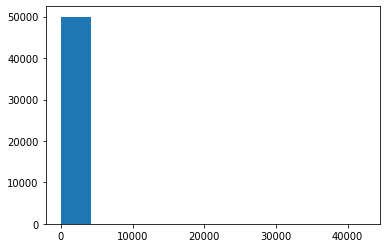

In [15]:
plt.hist(sn)

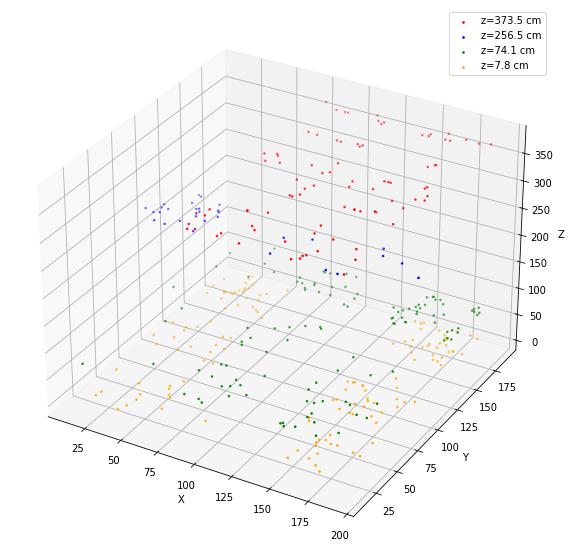

In [16]:
fig = plt.figure(figsize=(10,10))
colors =['red', 'blue', 'green','orange']
ax = fig.add_subplot(111,projection="3d")
for (x, y, zx, zy, col) in zip (xs, ys, zxs, zys, colors):
    ax.scatter(x[(x!=-1) & (y!=-1)], 
               y[(x!=-1) & (y!=-1)],  
               zx, 
               c=col, label="z={} cm".format(zx), s=2.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc='upper right')
plt.show()

In [14]:
tol = 20
np.argwhere(y0[y0!=-1] == y1[y1!=-1]+tol)

<ipython-input-14-cf98dbc82a37>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.argwhere(y0[y0!=-1] == y1[y1!=-1]+tol)


array([], shape=(0, 0), dtype=int64)

In [15]:
y0[y0!=-1][0]

31.4375

In [16]:
y1[y1!=-1][0]

93.10625

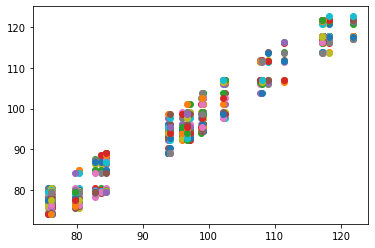

In [33]:
tol = 5
for xi in y0[y0!=-1][:100]:
    for xj in y1[y1!=-1][:100]:
        if np.abs(xi-xj)<=tol:
            plt.scatter(xi, xj)
plt.show()

In [32]:
np.isclose(y0[y0!=-1][:200], y1[y1!=-1][:200], rtol=5)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
np.isclose?

In [39]:
c0 = rnp.root2array(fname, treename="T", branches="clustersize.clustersize0")
c1 = rnp.root2array(fname, treename="T", branches="clustersize.clustersize1")
c2 = rnp.root2array(fname, treename="T", branches="clustersize.clustersize2")
c3 = rnp.root2array(fname, treename="T", branches="clustersize.clustersize3")

In [45]:
csizes = np.concatenate([rnp.root2array(fname, treename="T", 
                               branches="clustersize.clustersize{}".format(c)) for c in range(24)])

In [47]:
csn = np.concatenate([rnp.root2array(fname, treename="T", 
                               branches="clustersn.clustersn{}".format(c)) for c in range(24)])

In [52]:
cint = np.concatenate([rnp.root2array(fname, treename="T", 
                               branches="clusterintegral.clusterintegral{}".format(c)) for c in range(24)])

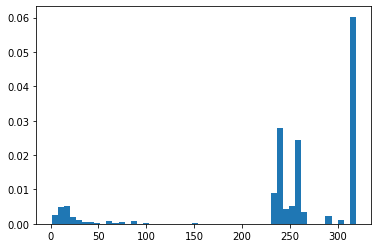

In [66]:
plt.hist(csizes[np.nonzero(csizes)], bins=50, density=True)
plt.show()

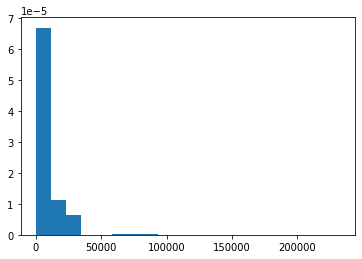

In [58]:
plt.hist(csn[np.nonzero(csn)], bins=20, density=True)
plt.show()

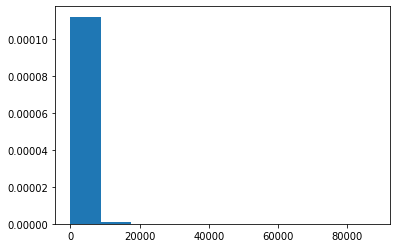

In [68]:
plt.hist(cint[np.nonzero(cint)], density=True)
plt.show()

In [67]:
cint[np.nonzero(cint)]

array([ 706.61294572,   43.28184649,  213.57880096, ...,  207.54623526,
       1210.64074527,  828.87614002])